In [1]:
import os
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import gensim.utils
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


[nltk_data] Downloading package punkt to C:\Users\Khor Kean
[nltk_data]     Teng\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\Khor Kean
[nltk_data]     Teng\AppData\Roaming\nltk_data...


In [2]:
nltk.download('stopwords')
import pandas as pd
stop_words = set(stopwords.words("english"))
stop = stopwords.words("english")


[nltk_data] Downloading package stopwords to C:\Users\Khor Kean
[nltk_data]     Teng\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
import itertools
#from google.colab import drive
#drive.mount('/content/drive')


In [6]:
# Helper method
#function to normalize description tokenize remove stopwords
def norm(desc):
    desc = str(desc)
    desc = re.sub('[^a-zA-Z]',' ',desc)
    desc = desc.lower()
    desc = re.sub(pattern='\s+', repl=' ', string=desc)
    desc = nltk.word_tokenize(desc)
    return desc


# Get  the nouns / proper nouns / adjectives
def postagwords(tagged_stanzas):
  chunkGram = r"""NP: {<NN>+<PUNCT>+}"""
  chunkGram = r"""chunk: {<JJ>+}"""
  chunkGram = r"""chunk: {<NN>+<NN>+<NN>+}"""
  #Chunk 3: Sequence of Nouns
  chunkGram = r"""chunk: {<NN|NNP|NNS|NNPS>+}"""
  chunkGram = r"""NP: {<NN|NNP|NNS|NNPS>+}"""
  chunkParser = nltk.RegexpParser(chunkGram)
  nouns = []
  finalpos= []

  for i in tagged_stanzas:
    tree1 = chunkParser.parse(i)
    nouns = [(word) for (word, pos) in i if pos == 'NN' or pos == 'NNS' or pos=='NNP' or pos=='JJ']
    finalpos.append(nouns)

  flat_list = list(itertools.chain(*finalpos))
  return flat_list



#Skills Frequency
def most_frequent_skills(flat_list):
  tag_fd = nltk.FreqDist(flat_list)
  countsskills = pd.DataFrame(tag_fd.items(), columns=['word', 'frequency'])
  # print('before')
  # print(countsskills)
  countsskills =countsskills[countsskills['word'].isin(['statistics', 'machine',  'r', 'python', 'nlp',  'neural','forecasting','tableau','power','bi',
                        'software','programming'  'cloud' , 'aws','sas','regression','predictive', 'modeling','clustering' ,'database','databases',
                        'datawarehouse','excel','pytorch','gcp','ETL','business','visualization','macros','operations','documentation','azure','ops','microsoft','powerpoint'
                        'communication','interpersonal','storytelling','marketing','terradata','splunk','ruby','spark','cassandra','mongodb','scala','api','segmentation','targeting',
                        'reporting','quality','a/b','html','css','sales','visio','logistics'
                        'project','access','qa','quality','agile','scrum','jira'])]
  countsskills.sort_values(by=['frequency'],ascending=False)
  # print('after')
  # print(countsskills)
  return countsskills[:30]


In [13]:
job_df=pd.read_csv('../data/linkedin_job.csv')
print(len(job_df))


2190


In [17]:
job_df.head()

,Posting Company,Job Title,All Skills,Job Location,Count of All
0,"1-800-FLOWERS.COM, INC.",Business Operations Analyst,business excel marketing microsoft,"Jericho, NY",1
1,"1-Stop Design Shop, Inc.",SEO & Social Media Marketing Analyst,marketing visualization business reporting api,"Woburn, MA",1
2,1E,Customer Experience Operations Analyst,operations business sales,"Austin, TX",2
3,1st Advantage Federal Credit Union,Marketing Analyst (On-site),marketing database excel software business,"Yorktown, VA",1
4,2-10 Home Buyers Warranty,Operations Analyst I,operations quality reporting business microsoft,United States,1


In [23]:
job_df['All  Skills']

0                      business excel marketing microsoft
1          marketing visualization business reporting api
2                               operations business sales
3              marketing database excel software business
4         operations quality reporting business microsoft
                              ...                        
2185        operations business documentation sales scrum
2186                               business excel tableau
2187    business marketing database segmentation modeling
2188         business marketing segmentation predictive r
2189      business database documentation microsoft power
Name: All  Skills, Length: 2190, dtype: object

In [25]:
#running function on description column
job_df_Desc=job_df['All  Skills'].apply(lambda x:norm(x))
job_df_Desc

0                 [business, excel, marketing, microsoft]
1       [marketing, visualization, business, reporting...
2                           [operations, business, sales]
3        [marketing, database, excel, software, business]
4       [operations, quality, reporting, business, mic...
                              ...                        
2185    [operations, business, documentation, sales, s...
2186                           [business, excel, tableau]
2187    [business, marketing, database, segmentation, ...
2188    [business, marketing, segmentation, predictive...
2189    [business, database, documentation, microsoft,...
Name: All  Skills, Length: 2190, dtype: object

In [26]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Khor Kean
[nltk_data]     Teng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
#removing stopwords from description
stop= nltk.corpus.stopwords.words('english')
new=['job','note','sexual','orientation','equal','opportunity','gender','plus','years','scientist','analyst','based','data','knowledge','discrimination','experience','description','summary','information','etc','eg','layers']
stop.extend(new)
job_df_clean=job_df_Desc.apply(lambda x:[item for item in x if item not in set(stop)])


In [28]:
job_df.loc[:,'tokenized_Description'] = job_df_clean

In [29]:
job_df.loc[:,'tokenized_Description']

0                 [business, excel, marketing, microsoft]
1       [marketing, visualization, business, reporting...
2                           [operations, business, sales]
3        [marketing, database, excel, software, business]
4       [operations, quality, reporting, business, mic...
                              ...                        
2185    [operations, business, documentation, sales, s...
2186                           [business, excel, tableau]
2187    [business, marketing, database, segmentation, ...
2188    [business, marketing, segmentation, predictive...
2189    [business, database, documentation, microsoft,...
Name: tokenized_Description, Length: 2190, dtype: object

In [30]:
import gensim.utils
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec

In [31]:
#Topic Modeling
# !pip install spacy
# !pip install pyLDAvis
# !pip install --upgrade gensim
import re
import numpy as np
import pandas as pd
import nltk
import sklearn
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


# # Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim_models as plt_gensim # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [32]:
df = job_df
df["All  Skills"] = df["All  Skills"].fillna("")
df["tokenized_Description"]

0                 [business, excel, marketing, microsoft]
1       [marketing, visualization, business, reporting...
2                           [operations, business, sales]
3        [marketing, database, excel, software, business]
4       [operations, quality, reporting, business, mic...
                              ...                        
2185    [operations, business, documentation, sales, s...
2186                           [business, excel, tableau]
2187    [business, marketing, database, segmentation, ...
2188    [business, marketing, segmentation, predictive...
2189    [business, database, documentation, microsoft,...
Name: tokenized_Description, Length: 2190, dtype: object

In [33]:
#remove stopwords
import regex as re
df['tokenized_desc_join'] = [' '.join(map(str, l)) for l in df['tokenized_Description']]

df


,Posting Company,Job Title,All Skills,Job Location,Count of All,tokenized_Description,tokenized_desc_join
0,"1-800-FLOWERS.COM, INC.",Business Operations Analyst,business excel marketing microsoft,"Jericho, NY",1,"[business, excel, marketing, microsoft]",business excel marketing microsoft
1,"1-Stop Design Shop, Inc.",SEO & Social Media Marketing Analyst,marketing visualization business reporting api,"Woburn, MA",1,"[marketing, visualization, business, reporting...",marketing visualization business reporting api
2,1E,Customer Experience Operations Analyst,operations business sales,"Austin, TX",2,"[operations, business, sales]",operations business sales
3,1st Advantage Federal Credit Union,Marketing Analyst (On-site),marketing database excel software business,"Yorktown, VA",1,"[marketing, database, excel, software, business]",marketing database excel software business
4,2-10 Home Buyers Warranty,Operations Analyst I,operations quality reporting business microsoft,United States,1,"[operations, quality, reporting, business, mic...",operations quality reporting business microsoft
...,...,...,...,...,...,...,...
2185,Zenefits,Business Analyst,operations business documentation sales scrum,United States,1,"[operations, business, documentation, sales, s...",operations business documentation sales scrum
2186,Zip Co,Data Scientist II,business excel tableau,"New York, NY",1,"[business, excel, tableau]",business excel tableau
2187,Zoro US,"Sr Marketing Analyst, Zoro",business marketing database segmentation modeling,"Illinois, United States",1,"[business, marketing, database, segmentation, ...",business marketing database segmentation modeling
2188,Zoro US,Sr. Email Marketing Analyst,business marketing segmentation predictive r,"Chicago, IL",1,"[business, marketing, segmentation, predictive...",business marketing segmentation predictive r


In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Khor Kean Teng\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [37]:
#df['Skills5'][999:2000]
#df=df[df['Job Category'] == 'Data Science']
#len(df)

KeyError: 'Job Category'

In [38]:
# POS Tag matching
tagged_stanzas = []
tagged = []
wrdcld=[]
i=0
for row in df['tokenized_Description'][:1000]:
    #POS tag generator
    tagged_word = nltk.pos_tag(row)
    tagged_stanzas.append(tagged_word)
    #Rule based matching
    finalpostagged = postagwords(tagged_stanzas)

    #Top skills extraction
    skills= most_frequent_skills(finalpostagged)

    k=0
    for j in skills['word']:
      index= str('Skills')+str(k+1)
      wrdcld.append(j)
      k=k+1
      df.loc[i,index]= j
    i=i+1
    tagged_stanzas =[]


# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error"
tagged.append(tagged_stanzas)


In [41]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [42]:
import spacy
from spacy import displacy

for sentence in df['All  Skills'].sample(5, random_state = 10):
    sentence_doc = nlp(sentence[:89])

    displacy.render(sentence_doc, style='dep', jupyter=True)
    print("Sentence is: ", sentence_doc)

Sentence is:  marketing business operations segmentation business


Sentence is:  business marketing bi


Sentence is:  marketing business modeling power bi


Sentence is:  business marketing sales operations microsoft


Sentence is:  marketing business reporting software microsoft


In [43]:
test="B.S. in Computer Science, Math, Engineering, Finance, or related quantitative field.Work experience with MS Excel, MS Access, SQL Server, Teradata, Oracle, or comparable database systems."

sentence_doc = nlp(test)

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  B.S. in Computer Science, Math, Engineering, Finance, or related quantitative field.Work experience with MS Excel, MS Access, SQL Server, Teradata, Oracle, or comparable database systems.


In [44]:
test="We are looking for a highly-skilled Data Scientist with experience performing statistical analysis, predictive analytics, and attribution modeling among others. The role will be involved in things like helping identify important user subgroups, informing ad spend, email targeting, and A/B testing"
sentence_doc = nlp(test)
options={'compact' :True,'color':'green'}
displacy.render(sentence_doc, style='dep', jupyter=True, options=options)
print("Sentence is: ", sentence_doc)

Sentence is:  We are looking for a highly-skilled Data Scientist with experience performing statistical analysis, predictive analytics, and attribution modeling among others. The role will be involved in things like helping identify important user subgroups, informing ad spend, email targeting, and A/B testing


In [ ]:
#!pip install openpyxl
# df.to_excel("drive/My Drive/jobswithskills.xlsx")

In [45]:
finalpostagged
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [48]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(wrdcld)
stop_words = ['business','analytic','team', 'product','analytics','customer','operations','quality','marketing']
wordcloud = WordCloud(width = 1000, height = 500,stopwords = stop_words,background_color='navy', colormap='rainbow').generate(unique_string)


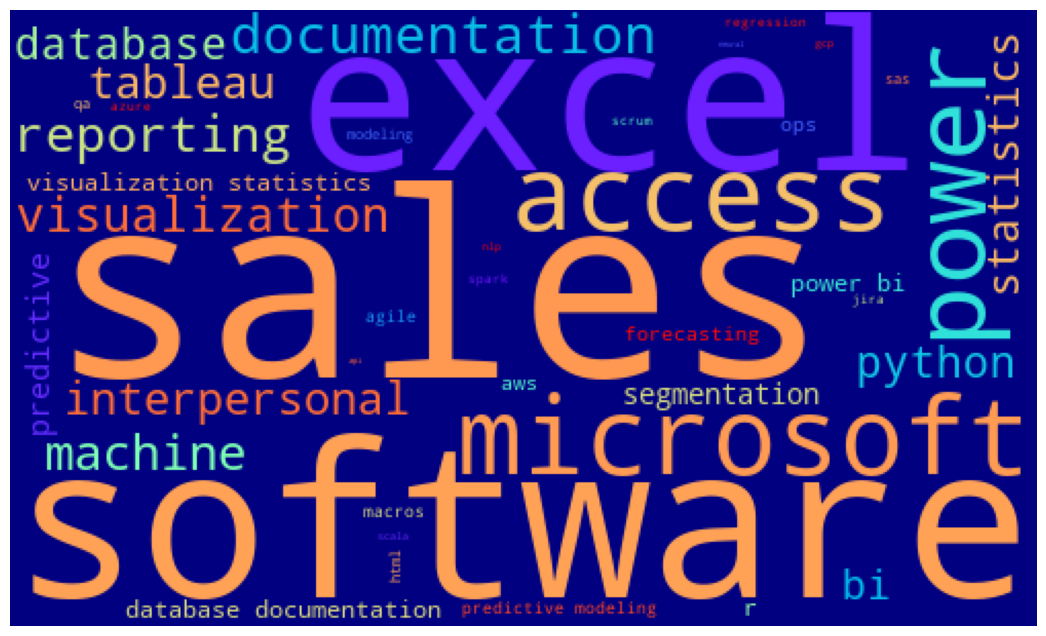

In [49]:
wordcloud =  WordCloud(width = 500, height = 300,stopwords = stop_words,background_color='navy', colormap='rainbow').generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


In [51]:
model = Word2Vec(df['tokenized_Description'] ,
                               window=10,
                               min_count=10,
                               workers=5)
model.train(df['tokenized_Description'] ,total_examples=700,epochs=model.epochs)
model.build_vocab(df['tokenized_Description'],progress_per=100,update=True)


In [53]:
model1 = Word2Vec(df['tokenized_Description'] ,
                               window=10,
                               min_count=10,
                               workers=5)
model1.train(df['tokenized_Description'],total_examples=700,epochs=model.epochs)
model1.build_vocab(df['tokenized_Description'],progress_per=100,update=True)

In [54]:
['statistics', 'machine', 'deep', 'learning', 'r', 'python',
                      'business', 'software',  'cloud' , 'aws','sas','regression','predictive', 'modeling','clustering','time','series' ]

['statistics',
 'machine',
 'deep',
 'learning',
 'r',
 'python',
 'business',
 'software',
 'cloud',
 'aws',
 'sas',
 'regression',
 'predictive',
 'modeling',
 'clustering',
 'time',
 'series']

In [61]:
# data science specific skills
model.wv.most_similar(['statistics', 'machine', 'r', 'python',
                      'business', 'software', 'aws','sas','regression','predictive', 'modeling' ],topn=25)

[('quality', 0.9989258050918579),
 ('visualization', 0.9988496899604797),
 ('access', 0.9987931847572327),
 ('agile', 0.9987571835517883),
 ('documentation', 0.9986892342567444),
 ('tableau', 0.998563826084137),
 ('database', 0.9984953999519348),
 ('power', 0.998478889465332),
 ('bi', 0.9983660578727722),
 ('segmentation', 0.998355507850647),
 ('interpersonal', 0.9983460903167725),
 ('operations', 0.9982795715332031),
 ('qa', 0.9982783198356628),
 ('excel', 0.9982733130455017),
 ('nlp', 0.9982690811157227),
 ('microsoft', 0.998218834400177),
 ('forecasting', 0.9981870055198669),
 ('databases', 0.9981276392936707),
 ('reporting', 0.9981181621551514),
 ('marketing', 0.998065173625946),
 ('spark', 0.9980390071868896),
 ('ops', 0.9979171752929688),
 ('jira', 0.9978780150413513),
 ('gcp', 0.9978746175765991),
 ('sales', 0.997848391532898)]

In [62]:
model.wv.most_similar(['python'],topn=30,)

[('software', 0.9985017776489258),
 ('predictive', 0.9980109930038452),
 ('quality', 0.9980050325393677),
 ('sas', 0.9980013966560364),
 ('access', 0.9979282021522522),
 ('agile', 0.9978899955749512),
 ('documentation', 0.997824490070343),
 ('visualization', 0.9977724552154541),
 ('modeling', 0.9976564645767212),
 ('bi', 0.9976466298103333),
 ('r', 0.9976270794868469),
 ('aws', 0.9975959658622742),
 ('microsoft', 0.9975441098213196),
 ('machine', 0.9974924921989441),
 ('database', 0.9974692463874817),
 ('forecasting', 0.9974595308303833),
 ('segmentation', 0.997444748878479),
 ('tableau', 0.997411847114563),
 ('statistics', 0.9973779916763306),
 ('power', 0.9973750114440918),
 ('interpersonal', 0.9971438646316528),
 ('ops', 0.9971372485160828),
 ('business', 0.9970787167549133),
 ('marketing', 0.9970358610153198),
 ('jira', 0.9970332384109497),
 ('operations', 0.9969657063484192),
 ('azure', 0.996964693069458),
 ('databases', 0.9969645738601685),
 ('regression', 0.9969183206558228),
 (

In [68]:
# testing
model.wv.most_similar(['business'],topn=30,)

[('power', 0.997542679309845),
 ('tableau', 0.9974197149276733),
 ('predictive', 0.9973845481872559),
 ('visualization', 0.997348427772522),
 ('sas', 0.997256875038147),
 ('segmentation', 0.9971304535865784),
 ('ops', 0.9971011281013489),
 ('statistics', 0.9970994591712952),
 ('python', 0.9970787167549133),
 ('modeling', 0.9969323873519897),
 ('aws', 0.9968849420547485),
 ('microsoft', 0.9968566298484802),
 ('software', 0.9968417286872864),
 ('access', 0.9968124032020569),
 ('qa', 0.9968082308769226),
 ('database', 0.9967713952064514),
 ('documentation', 0.9967510104179382),
 ('gcp', 0.9967208504676819),
 ('r', 0.9967146515846252),
 ('quality', 0.9967001080513),
 ('agile', 0.9966250061988831),
 ('spark', 0.9965166449546814),
 ('interpersonal', 0.996508777141571),
 ('jira', 0.9964779615402222),
 ('excel', 0.9963871240615845),
 ('machine', 0.9963172674179077),
 ('operations', 0.9962949752807617),
 ('bi', 0.996242880821228),
 ('sales', 0.9961645603179932),
 ('macros', 0.9961335062980652)]

In [63]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

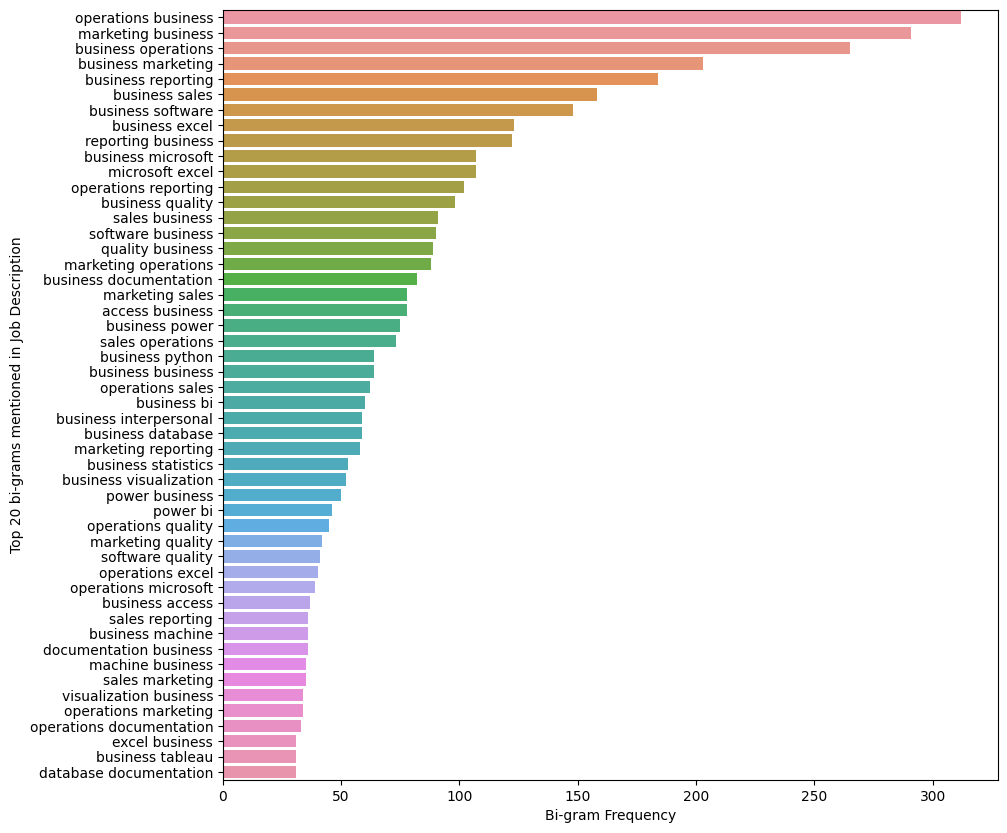

In [64]:
#n-grams in description

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:50]

    top_n_bigrams=_get_top_ngram(text,n)[:50]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in Job Description")
    sns.barplot(x=y,y=x)

plot_top_ngrams_barchart(df['tokenized_desc_join'],2)
plt.show()